In [44]:
!git clone https://github.com/Ashutosh-Vermaa/K-means-Clustering.git

fatal: destination path 'K-means-Clustering' already exists and is not an empty directory.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
data= pd.read_csv("/content/K-means-Clustering/Customers.csv")

In [47]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:

#to be able to visualize the plot, we use 2D data
df= data.iloc[:, 3:5]

Text(0, 0.5, 'Wccs')

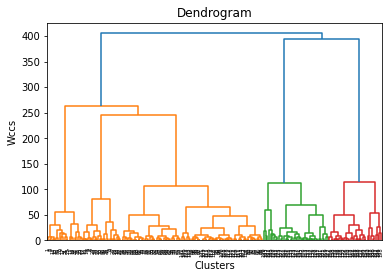

In [49]:
#creating dendrogram
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(df, method= 'ward'))

#ward metric of distance- similarity of clusters is based on the increase in the wcss (within cluster squared sum) when
#two clusters are merged. i.e. the clusters which result in minimum wcss are merged

#the way we merge the clusters decide the shape of the dendrogram
plt.title("Dendrogram")
plt.xlabel('Clusters')
plt.ylabel('Wccs')

In [50]:
#we can see that the organge line below D pf 'Dendogram' title satisfies the condition- the longest vertical line
#which is not cut by any horizontal line.

#this also gives us k=5 similar to k-means

In [51]:
from sklearn.cluster import AgglomerativeClustering # (bottom up approach)

hc= AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage= 'ward')
"""
Affinity- The metric to use when calculating distance between instances in a feature array

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

‘ward’ minimizes the variance of the clusters being merged."""

'\nAffinity- The metric to use when calculating distance between instances in a feature array\n\nThe linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.\n\n‘ward’ minimizes the variance of the clusters being merged.'

In [52]:
label=hc.fit_predict(df)

In [53]:
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [54]:
df['label']= label

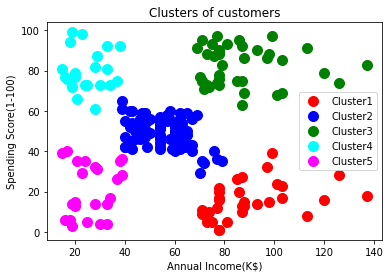

In [55]:
plt.scatter(df[df.label==0].iloc[:,0],df[df.label==0].iloc[:,1],s=100,c='red',label='Cluster1') #taking annual income as x and spending as y 
plt.scatter(df[df.label==1].iloc[:,0],df[df.label==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(df[df.label==2].iloc[:,0],df[df.label==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(df[df.label==3].iloc[:,0],df[df.label==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(df[df.label==4].iloc[:,0],df[df.label==4].iloc[:,1],s=100,c='magenta',label='Cluster5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [56]:
df.iloc[:,:-1]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [59]:
from sklearn.metrics import silhouette_samples,silhouette_score
lst_sl_avg=[]
for i in range(2,10):
    hc= AgglomerativeClustering(n_clusters= i, affinity='euclidean', linkage= 'ward')
    cluster_labels=hc.fit_predict(df.iloc[:,:-1])
    sil_avg=silhouette_score(df.iloc[:,:-1],cluster_labels)
    lst_sl_avg.append(sil_avg)

In [61]:
lst_sl_avg #we can see that k=5 clusters the data best

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897,
 0.5380208285578872,
 0.519904611908887,
 0.4326286245782246,
 0.43892545672004507]